In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [2]:
import preprocessing 

In [3]:
data = pd.read_csv('german_credit_data.csv')
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## 1. Preprocessing

In [4]:
numeric_col = preprocessing.preprocessing_train(data)
numeric_col.head()

 Preprocessing objects saved to 'preprocessors.pkl'


,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_encoding,Saving accounts_encoding,Checking account_encoding
0,0.857143,2,0.358311,0.029412,0,1,2.0,0.0,0.0
1,0.053571,2,0.736970,0.647059,1,0,2.0,0.0,1.0
2,0.535714,1,0.494135,0.117647,0,1,2.0,0.0,0.0
3,0.464286,2,0.802375,0.558824,0,1,0.0,0.0,0.0
4,0.607143,2,0.690315,0.294118,0,1,0.0,0.0,0.0


## 2. DBScan

In [5]:
clustering = DBSCAN(eps=.4,min_samples=4).fit_predict(numeric_col)

In [6]:
clustering[:100]

array([ 0,  1,  2,  3,  3, -1,  4,  5, -1,  6,  7,  8,  1,  2,  8, -1,  0,
        0, -1,  4,  0, -1,  9, 10,  0,  2,  2, -1, 11,  0, 12,  0, 10,  9,
       -1, 13,  3, 14, 14, 11, 15, -1, 13, -1, -1, 16,  4, -1,  2, 17, 13,
        6,  0,  0, 39,  2,  6, 18, -1, 19, 11, 11, 32, 11, 18,  0, 18, 12,
        3, 18, 18,  9, 20, 29, 21, 20,  0, 11,  2, 11, 18,  4, -1, 22,  2,
       16,  1, -1, -1,  0,  0,  0, 22, 23, 12, -1, 18, 10, 11,  5])

In [7]:
unique, counts = np.unique(clustering, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(-1): np.int64(169), np.int64(0): np.int64(171), np.int64(1): np.int64(27), np.int64(2): np.int64(63), np.int64(3): np.int64(36), np.int64(4): np.int64(21), np.int64(5): np.int64(6), np.int64(6): np.int64(44), np.int64(7): np.int64(5), np.int64(8): np.int64(42), np.int64(9): np.int64(12), np.int64(10): np.int64(17), np.int64(11): np.int64(55), np.int64(12): np.int64(6), np.int64(13): np.int64(27), np.int64(14): np.int64(16), np.int64(15): np.int64(4), np.int64(16): np.int64(10), np.int64(17): np.int64(7), np.int64(18): np.int64(72), np.int64(19): np.int64(9), np.int64(20): np.int64(13), np.int64(21): np.int64(11), np.int64(22): np.int64(14), np.int64(23): np.int64(4), np.int64(24): np.int64(8), np.int64(25): np.int64(26), np.int64(26): np.int64(6), np.int64(27): np.int64(12), np.int64(28): np.int64(18), np.int64(29): np.int64(10), np.int64(30): np.int64(4), np.int64(31): np.int64(5), np.int64(32): np.int64(9), np.int64(33): np.int64(6), np.int64(34): np.int64(5), np.int64(35):

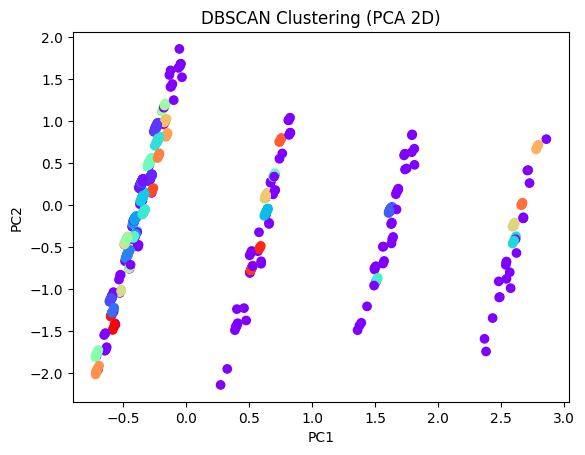

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(numeric_col)

plt.scatter(reduced[:, 0], reduced[:, 1], c=clustering, cmap='rainbow')
plt.title("DBSCAN Clustering (PCA 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [9]:
from sklearn.metrics import silhouette_score

mask = clustering != -1 

if len(set(clustering[mask])) > 1:
    score = silhouette_score(numeric_col[mask], clustering[mask])
    print("Silhouette Score:", score)
else:
    print("Not enough clusters to compute silhouette score.")

Silhouette Score: 0.656270902942562
